<a href="https://colab.research.google.com/github/AngelaCorvino/BrainAge/blob/main/statanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

In [2]:
dataset_file = 'https://raw.githubusercontent.com/AngelaCorvino/BrainAge/main/data/FS_features_ABIDE_males.csv'
df = pd.read_csv(dataset_file,sep=';')
df['Site'] = df.FILE_ID.apply(lambda x: x.split('_')[0])
df_ASD=df.loc[df.DX_GROUP==1]
df_TD=df.loc[df.DX_GROUP==-1]

Define two classes with and age treshold

(246, 425) (218, 425)


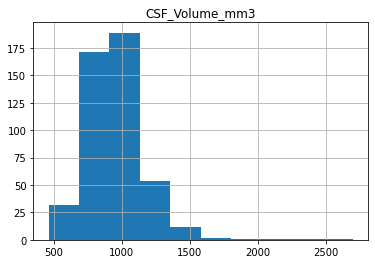

In [8]:
df_TD[df_TD.CSF_Volume_mm3>0].hist('CSF_Volume_mm3')
df_TD = df_TD[df_TD.CSF_Volume_mm3>0]
df_TD1 = df_TD[df_TD.CSF_Volume_mm3<950]
df_TD2 = df_TD[df_TD.CSF_Volume_mm3>950]
print(df_TD1.shape,df_TD2.shape)

# Permutation test

In [9]:

Avg_obs_diff =df_TD1.mean()-df_TD2.mean()
Avg_obs_diff 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


AGE_AT_SCAN                               -3.382055
SEX                                        0.000000
FIQ                                       -6.619658
DX_GROUP                                   0.000000
lh_caudalanteriorcingulate_SurfArea      -57.686134
                                           ...     
lhCortexVol                            -1568.194092
rhCortexVol                            -1833.198669
lhCerebralWhiteMatterVol              -16174.583177
rhCerebralWhiteMatterVol              -16418.056155
TotalGrayVol                           -9180.643189
Length: 423, dtype: float64

## Evaluation of the empirical $p$-value

We want to know if the CSF volume can be a good variable to describe the age of an healthy subject

How many of the null means are bigger than the observed value? That proportion would be the $p$-value for the null hypothesis.

$p = \frac{r+1}{N+1}$

where $N$ is the number of permutations and r is the number of times that $t_i > t_{obs}$ 

We add a 1 to the numerator and denominator to account for misestimation of the p-value (see the reference "Permutation p-values should never be zero: calculating exact P-values when permutations are randomly drawn" https://pubmed.ncbi.nlm.nih.gov/21044043/ )